In [1]:
# import necessary libraries
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

### Task 1: Implementing the intensity transformation

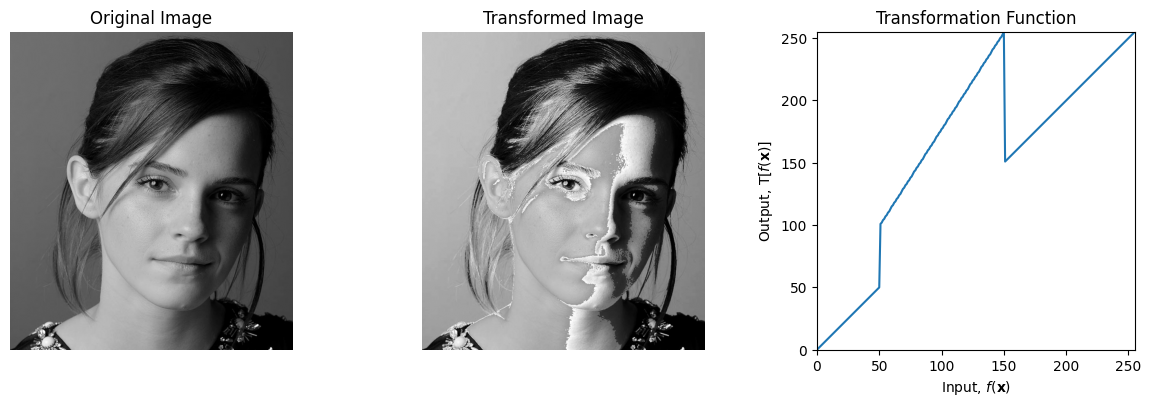

In [2]:
c = np.array([(50, 50), (50, 100), (150, 255), (150, 150), (255, 255)])

t1 = np.linspace(0, c[0, 0], c[0, 1] + 1 - 0).astype('uint8')
t2 = np.linspace(c[0, 1] + 1, c[1, 1], c[1, 0] - c[0, 0]).astype('uint8')
t3 = np.linspace(c[1, 1] + 1, c[2, 1], c[2, 0] - c[1, 0]).astype('uint8')
t4 = np.linspace(c[2, 1] + 1, c[3, 1], c[3, 0] - c[2, 0]).astype('uint8')
t5 = np.linspace(c[3, 1] + 1, c[4, 1], c[4, 0] - c[3, 0]).astype('uint8')

transform = np.concatenate((t1, t2, t3, t4, t5), axis=0).astype('uint8')
im_emma = cv.imread("a1images\\emma.jpg", cv.IMREAD_GRAYSCALE)

fig, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].imshow(im_emma, cmap='gray', vmin=0, vmax=255)
ax[0].axis('off')
ax[0].set_title('Original Image')

ax[1].imshow(cv.LUT(im_emma, transform), cmap='gray', vmin=0, vmax=255)
ax[1].axis('off')
ax[1].set_title('Transformed Image')

ax[2].plot(transform)
ax[2].set_title('Transformation Function')
ax[2].set_xlabel(r'Input, $f(\mathbf{x})$')
ax[2].set_ylabel('Output, $\\mathrm{T}[f(\\mathbf{x})]$')
ax[2].set_xlim(0, 255)
ax[2].set_ylim(0, 255)
ax[2].set_aspect('equal')

plt.tight_layout()
plt.show()

### Task 2: Apply operations to accentuate
(a) white matter
(b) gray matter

### Task 3: Gamma correction in L*a*b* color space

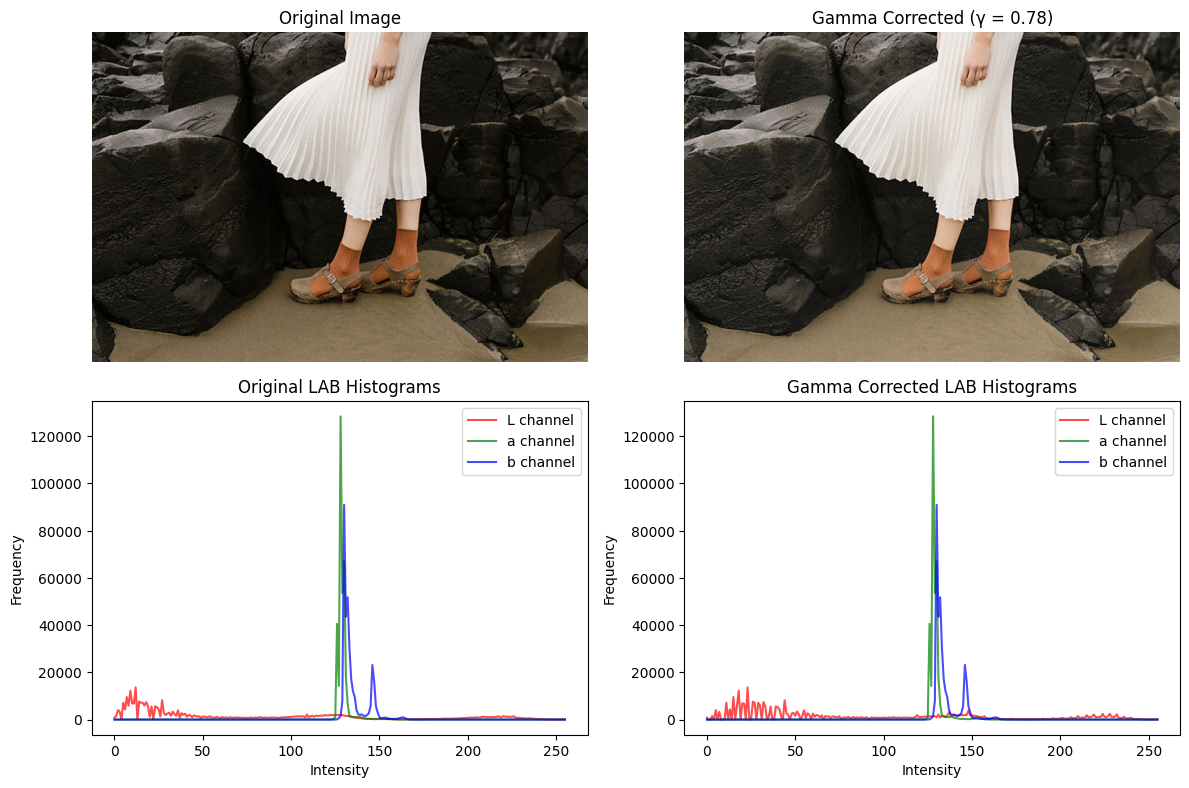

In [9]:
im = cv.imread("a1images\\highlights_and_shadows.jpg")  # Read normally first
im_lab = cv.cvtColor(im, cv.COLOR_BGR2LAB)
L, a, b = cv.split(im_lab)

gamma = 0.78
L_corrected = np.array([((i / 255.0) ** gamma) * 255.0 for i in range(0, 256)]).astype('uint8')
L_gamma = cv.LUT(L, L_corrected)

lab_corrected = cv.merge((L_gamma, a, b))
im_corrected = cv.cvtColor(lab_corrected, cv.COLOR_LAB2RGB)

fig, ax = plt.subplots(2, 2, figsize=(12, 8))

# Original and corrected images
ax[0, 0].imshow(cv.cvtColor(im, cv.COLOR_BGR2RGB))
ax[0, 0].set_title('Original Image')
ax[0, 0].axis('off')

ax[0, 1].imshow(im_corrected)  # Remove the extra cvtColor call
ax[0, 1].set_title(f'Gamma Corrected (γ = {gamma})')
ax[0, 1].axis('off')

space = ('L', 'a', 'b')
colors = ('red', 'green', 'blue')
images = [im_lab, lab_corrected]
titles = ['Original LAB Histograms', 'Gamma Corrected LAB Histograms']

for j, (img, title) in enumerate(zip(images, titles)):
    for i, (channel, color) in enumerate(zip(space, colors)):
        hist = cv.calcHist([img], [i], None, [256], [0, 256])
        ax[1, j].plot(hist, color=color, label=f'{channel} channel', alpha=0.7)
    
    ax[1, j].set_title(title)
    ax[1, j].set_xlabel('Intensity')
    ax[1, j].set_ylabel('Frequency')
    ax[1, j].legend()

plt.tight_layout()
plt.show()